<a href="https://colab.research.google.com/github/thejesht/machine_learning_projects/blob/main/Bolt_Analytics_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [549]:
#import necessary libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [550]:
#read provided dataset
df=pd.read_csv('Data Analysis Task III - Raw data.csv')
pd.set_option('display.max_columns', None)

In [551]:
#visualising dataset
df.head()

,Driver ID,Time,Day,Week,Rider ID,Pickup distance (meters),Ride distance (meters),Ride duration (seconds),Client rating,Client paid (Euros),Ride price (Euros),Pickup time (minutes)
0,92309986,11:59 pm,Monday,Week 2,17801128,198,5249.0,695.0,5.0,7.31,7.31,2:50
1,92309984,11:57 pm,Monday,Week 2,20448764,1653,19420.0,1760.0,5.0,21.11,21.11,4:40
2,92309982,11:57 pm,Monday,Week 2,20470064,2669,5370.0,616.0,5.0,7.16,7.16,5:59
3,92309976,11:55 pm,Monday,Week 2,20650920,169,13565.0,1359.0,5.0,15.58,15.58,0:38
4,92309974,11:55 pm,Monday,Week 2,13006764,558,11624.0,1083.0,5.0,13.22,13.22,2:29


In [552]:
df.shape

(71608, 12)

In [553]:
df.isnull().sum()

Driver ID                     0
Time                          0
Day                           0
Week                          0
Rider ID                      0
Pickup distance (meters)      0
Ride distance (meters)       13
Ride duration (seconds)      13
Client rating               239
Client paid (Euros)           0
Ride price (Euros)            0
Pickup time (minutes)         0
dtype: int64

In [554]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df.head(12)

,percent_missing
Driver ID,0.000000
Time,0.000000
Day,0.000000
Week,0.000000
Rider ID,0.000000
Pickup distance (meters),0.000000
Ride distance (meters),0.018154
Ride duration (seconds),0.018154
Client rating,0.333762
Client paid (Euros),0.000000


In [555]:
df1 = df[df['Ride distance (meters)'].isnull()]
df1.shape

(13, 12)

In [556]:
df1.head(13)

,Driver ID,Time,Day,Week,Rider ID,Pickup distance (meters),Ride distance (meters),Ride duration (seconds),Client rating,Client paid (Euros),Ride price (Euros),Pickup time (minutes)
2925,92301048,7:03 am,Monday,Week 2,20616868,1778,NaN,NaN,5.0,6.69,6.69,12:48
2984,92300876,6:54 am,Monday,Week 2,20164532,1133,NaN,NaN,5.0,12.23,12.23,7:22
3697,92298494,4:13 am,Monday,Week 2,20620696,924,NaN,NaN,5.0,13.66,13.66,2:40
5711,92292528,12:46 pm,Sunday,Week 2,20473076,1345,NaN,NaN,NaN,4.50,4.50,4:12
18047,92253570,3:07 am,Saturday,Week 2,20388696,1359,NaN,NaN,5.0,15.99,15.99,8:04
28655,92224068,9:34 am,Thursday,Week 2,18944012,632,NaN,NaN,NaN,6.44,6.44,3:31
28685,92224002,9:29 am,Thursday,Week 2,19859420,1167,NaN,NaN,NaN,9.56,9.56,4:18
28718,92223920,9:24 am,Thursday,Week 2,18860232,1282,NaN,NaN,NaN,14.07,14.07,4:46
35701,92205738,4:33 pm,Tuesday,Week 2,18736288,909,NaN,NaN,NaN,0.00,0.00,0:00
60920,92123542,9:14 am,Thursday,Week 1,17859260,108,NaN,NaN,5.0,10.01,10.01,0:47


In [557]:
df = df[df['Ride distance (meters)'].notna()]
df.shape

(71595, 12)

In [558]:
df['Client rating'].nunique()


5

In [559]:
df['Client rating'].value_counts()

5.0    64910
4.0     2501
1.0     1793
3.0     1472
2.0      685
Name: Client rating, dtype: int64

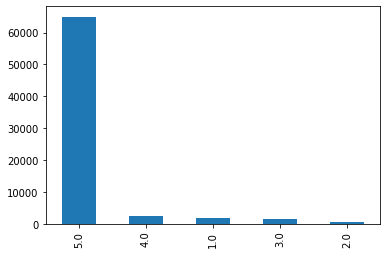

In [560]:
df['Client rating'].value_counts().plot.bar()

In [561]:
df['Client rating'].mode()[0]

5.0

In [562]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [563]:
for feature in ['Client rating']:
    impute_nan(df,feature)

In [564]:
df.isnull().sum()

Driver ID                   0
Time                        0
Day                         0
Week                        0
Rider ID                    0
Pickup distance (meters)    0
Ride distance (meters)      0
Ride duration (seconds)     0
Client rating               0
Client paid (Euros)         0
Ride price (Euros)          0
Pickup time (minutes)       0
dtype: int64

In [565]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

df[numerical_features].head()

Number of numerical variables:  8


,Driver ID,Rider ID,Pickup distance (meters),Ride distance (meters),Ride duration (seconds),Client rating,Client paid (Euros),Ride price (Euros)
0,92309986,17801128,198,5249.0,695.0,5.0,7.31,7.31
1,92309984,20448764,1653,19420.0,1760.0,5.0,21.11,21.11
2,92309982,20470064,2669,5370.0,616.0,5.0,7.16,7.16
3,92309976,20650920,169,13565.0,1359.0,5.0,15.58,15.58
4,92309974,13006764,558,11624.0,1083.0,5.0,13.22,13.22


In [566]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<10]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 1


In [567]:
discrete_feature

['Client rating']

In [568]:
continuous_feature=[feature for feature in numerical_features if len(df[feature].unique())>10]
print("Continuous Variables Count: {}".format(len(continuous_feature)))

Continuous Variables Count: 7


In [569]:
continuous_feature

['Driver ID',
 'Rider ID',
 'Pickup distance (meters)',
 'Ride distance (meters)',
 'Ride duration (seconds)',
 'Client paid (Euros)',
 'Ride price (Euros)']

In [570]:
df.shape

(71595, 12)

In [571]:
df['Driver ID'].nunique() # will need to drop column, as all driver id's are unique and doesnt contribute to any statistical relevance

71595

In [572]:
df.drop(columns=['Driver ID'], inplace = True)

In [573]:
df['Rider ID'].nunique()

25216

In [574]:
frequencies = df['Rider ID'].value_counts()
df['Rider ID'] = df['Rider ID'].apply(lambda x: frequencies[x])
df.head()

,Time,Day,Week,Rider ID,Pickup distance (meters),Ride distance (meters),Ride duration (seconds),Client rating,Client paid (Euros),Ride price (Euros),Pickup time (minutes)
0,11:59 pm,Monday,Week 2,12,198,5249.0,695.0,5.0,7.31,7.31,2:50
1,11:57 pm,Monday,Week 2,1,1653,19420.0,1760.0,5.0,21.11,21.11,4:40
2,11:57 pm,Monday,Week 2,4,2669,5370.0,616.0,5.0,7.16,7.16,5:59
3,11:55 pm,Monday,Week 2,1,169,13565.0,1359.0,5.0,15.58,15.58,0:38
4,11:55 pm,Monday,Week 2,3,558,11624.0,1083.0,5.0,13.22,13.22,2:29


In [575]:
df['Rider ID'].nunique()

37

In [576]:
numerical_features

['Driver ID',
 'Rider ID',
 'Pickup distance (meters)',
 'Ride distance (meters)',
 'Ride duration (seconds)',
 'Client rating',
 'Client paid (Euros)',
 'Ride price (Euros)']

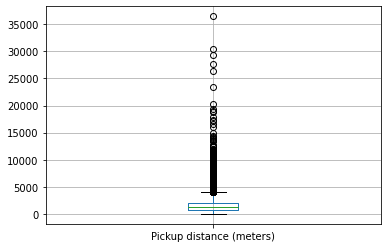

In [577]:
df.boxplot(column='Pickup distance (meters)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



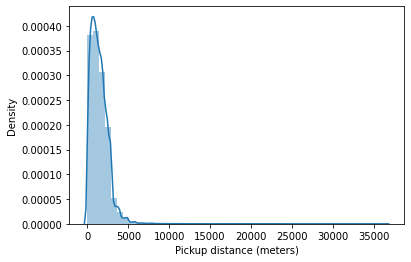

In [578]:
sns.distplot(df['Pickup distance (meters)'])

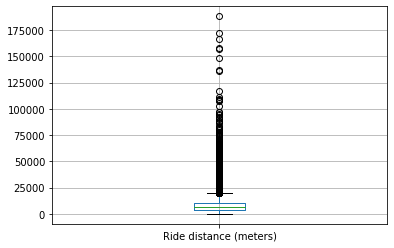

In [579]:
df.boxplot(column='Ride distance (meters)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



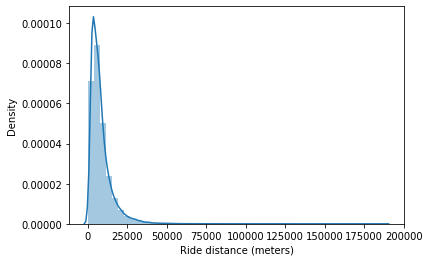

In [580]:
sns.distplot(df['Ride distance (meters)'])

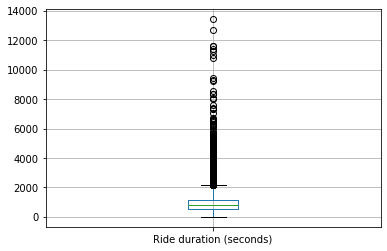

In [581]:
df.boxplot(column='Ride duration (seconds)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



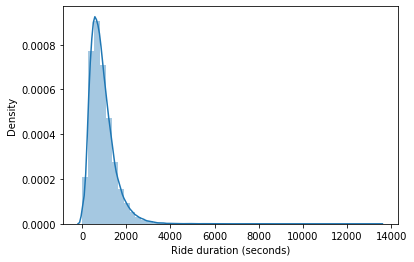

In [582]:
sns.distplot(df['Ride duration (seconds)'])

In [583]:
df['price_diff']=df['Ride price (Euros)'] - df['Client paid (Euros)']

In [584]:
df['price_diff'].min()

0.0

In [585]:
df['price_diff'].max()

50.099999999999994

In [586]:
df['price_diff'].nunique()

339

In [587]:
df['price_diff'].value_counts()

0.00     64289
5.00      4210
4.50       725
10.00      494
5.00       400
         ...  
7.45         1
9.28         1
5.30         1
8.79         1
9.62         1
Name: price_diff, Length: 339, dtype: int64

In [588]:
df['price_diff'].sum()

40345.28

In [589]:
filter = df['price_diff'] > 0.01
diff_filter= df[filter]
diff_filter.head()

,Time,Day,Week,Rider ID,Pickup distance (meters),Ride distance (meters),Ride duration (seconds),Client rating,Client paid (Euros),Ride price (Euros),Pickup time (minutes),price_diff
20,11:50 pm,Monday,Week 2,1,1783,5363.0,735.0,5.0,2.51,7.51,6:08,5.0
47,11:43 pm,Monday,Week 2,1,862,3968.0,585.0,5.0,1.03,6.03,4:44,5.0
64,11:38 pm,Monday,Week 2,1,516,6086.0,949.0,5.0,3.75,8.75,1:54,5.0
66,11:37 pm,Monday,Week 2,1,606,8666.0,1437.0,5.0,9.89,14.89,1:36,5.0
97,11:25 pm,Monday,Week 2,3,869,2403.0,423.0,5.0,0.00,4.50,5:44,4.5


In [590]:
diff_filter.shape

(7306, 12)

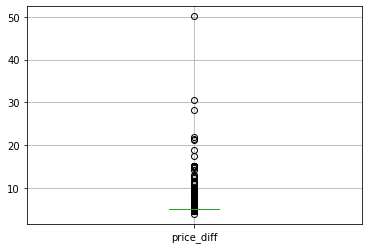

In [591]:
diff_filter.boxplot(column='price_diff')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



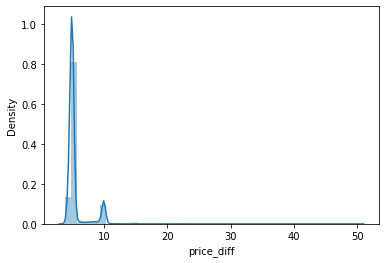

In [592]:
sns.distplot(diff_filter['price_diff'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



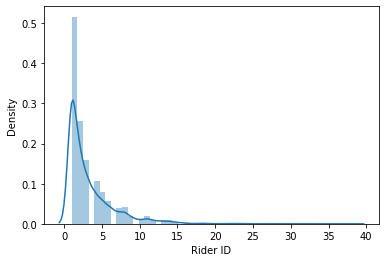

In [593]:
sns.distplot(diff_filter['Rider ID'])

In [594]:
filter1 = df['price_diff'] > 10.01
diff_filter1= df[filter1]
diff_filter1.head()

,Time,Day,Week,Rider ID,Pickup distance (meters),Ride distance (meters),Ride duration (seconds),Client rating,Client paid (Euros),Ride price (Euros),Pickup time (minutes),price_diff
6637,10:04 am,Sunday,Week 2,16,600,47725.0,2452.0,1.0,35.56,50.56,5:20,15.00
8062,6:25 am,Sunday,Week 2,2,3674,7954.0,1336.0,5.0,0.00,11.41,11:53,11.41
8636,5:00 am,Sunday,Week 2,15,1055,8513.0,1163.0,2.0,0.00,11.22,3:47,11.22
9916,1:18 am,Sunday,Week 2,4,3730,18404.0,2617.0,5.0,8.26,23.26,13:27,15.00
17821,3:46 am,Saturday,Week 2,5,1853,22595.0,2176.0,5.0,9.72,24.72,5:07,15.00


In [595]:
diff_filter1.shape

(32, 12)

In [596]:
diff_filter1.head(32)

,Time,Day,Week,Rider ID,Pickup distance (meters),Ride distance (meters),Ride duration (seconds),Client rating,Client paid (Euros),Ride price (Euros),Pickup time (minutes),price_diff
6637,10:04 am,Sunday,Week 2,16,600,47725.0,2452.0,1.0,35.56,50.56,5:20,15.00
8062,6:25 am,Sunday,Week 2,2,3674,7954.0,1336.0,5.0,0.00,11.41,11:53,11.41
8636,5:00 am,Sunday,Week 2,15,1055,8513.0,1163.0,2.0,0.00,11.22,3:47,11.22
9916,1:18 am,Sunday,Week 2,4,3730,18404.0,2617.0,5.0,8.26,23.26,13:27,15.00
17821,3:46 am,Saturday,Week 2,5,1853,22595.0,2176.0,5.0,9.72,24.72,5:07,15.00
18964,12:18 am,Saturday,Week 2,8,110,14110.0,2102.0,5.0,7.02,22.02,1:51,15.00
19184,11:26 pm,Friday,Week 2,3,938,14776.0,2130.0,5.0,3.97,18.97,10:32,15.00
31743,4:17 pm,Wednesday,Week 2,12,2992,12951.0,1324.0,5.0,13.80,26.87,6:45,13.07
38650,9:05 pm,Monday,Week 2,5,2193,10245.0,2141.0,5.0,15.71,30.59,9:19,14.88
38769,6:21 pm,Monday,Week 2,1,1997,16511.0,1183.0,5.0,19.33,40.52,10:53,21.19


In [597]:
df['Client paid (Euros)'].describe()

count    71595.000000
mean        11.114046
std          9.433065
min          0.000000
25%          5.420000
50%          8.650000
75%         13.420000
max        224.170000
Name: Client paid (Euros), dtype: float64

In [598]:
df['Ride price (Euros)'].describe()

count    71595.000000
mean        11.677567
std          9.366618
min          0.000000
25%          5.890000
50%          9.000000
75%         13.850000
max        224.170000
Name: Ride price (Euros), dtype: float64

In [599]:
df2 = df.groupby(['Rider ID'])['Client paid (Euros)'].agg(['sum', 'count', 'mean']) 
df2.head()

,sum,count,mean
Rider ID,,,
1,148463.81,10880,13.645571
2,126260.82,10354,12.194400
3,100000.57,8886,11.253722
4,78905.15,7268,10.856515
5,66846.65,6330,10.560292


In [600]:
df2.shape

(37, 3)

In [601]:
df2.head(37)

,sum,count,mean
Rider ID,,,
1,148463.81,10880,13.645571
2,126260.82,10354,12.194400
3,100000.57,8886,11.253722
4,78905.15,7268,10.856515
5,66846.65,6330,10.560292
6,49395.96,4950,9.978982
7,42739.56,4116,10.383761
8,39237.18,3896,10.071145
9,26280.22,2736,9.605344


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



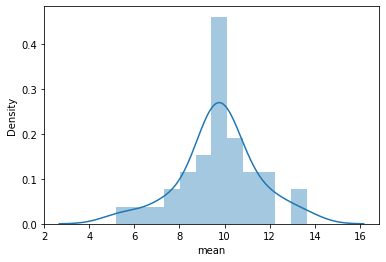

In [602]:
sns.distplot(df2['mean'])

In [603]:
df2['mean'].describe()

count    37.000000
mean      9.738657
std       1.732999
min       5.197632
25%       9.244469
50%       9.690571
75%      10.428653
max      13.645571
Name: mean, dtype: float64

In [604]:
df3 = df.groupby(['Rider ID'])['Ride price (Euros)'].agg(['sum', 'count', 'mean']) 
df3.head()

,sum,count,mean
Rider ID,,,
1,164687.32,10880,15.136702
2,133796.89,10354,12.922242
3,104627.40,8886,11.774409
4,81971.31,7268,11.278386
5,69144.90,6330,10.923365


In [605]:
df3.shape

(37, 3)

In [606]:
df3.head(37)

,sum,count,mean
Rider ID,,,
1,164687.32,10880,15.136702
2,133796.89,10354,12.922242
3,104627.40,8886,11.774409
4,81971.31,7268,11.278386
5,69144.90,6330,10.923365
6,51009.85,4950,10.305020
7,43832.69,4116,10.649342
8,40422.28,3896,10.375329
9,26862.21,2736,9.818059


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



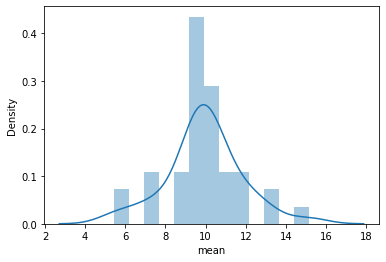

In [607]:
sns.distplot(df3['mean'])

In [608]:
df3['mean'].describe()

count    37.000000
mean      9.943662
std       1.878643
min       5.447632
25%       9.405992
50%       9.818059
75%      10.649342
max      15.136702
Name: mean, dtype: float64

In [609]:
df4 = df.groupby(['Rider ID'])['Ride distance (meters)'].agg(['sum', 'count', 'mean']) 
df4.head()

,sum,count,mean
Rider ID,,,
1,117417512.0,10880,10792.050735
2,94092534.0,10354,9087.553989
3,73120339.0,8886,8228.712469
4,57039565.0,7268,7848.041414
5,48030027.0,6330,7587.681991


In [610]:
df4.shape

(37, 3)

In [611]:
df4.head(37)

,sum,count,mean
Rider ID,,,
1,117417512.0,10880,10792.050735
2,94092534.0,10354,9087.553989
3,73120339.0,8886,8228.712469
4,57039565.0,7268,7848.041414
5,48030027.0,6330,7587.681991
6,34827527.0,4950,7035.864040
7,30254684.0,4116,7350.506317
8,27600842.0,3896,7084.405031
9,18200322.0,2736,6652.164474


In [612]:
df4['mean']= df4['mean']/1000
df4.head(37)

,sum,count,mean
Rider ID,,,
1,117417512.0,10880,10.792051
2,94092534.0,10354,9.087554
3,73120339.0,8886,8.228712
4,57039565.0,7268,7.848041
5,48030027.0,6330,7.587682
6,34827527.0,4950,7.035864
7,30254684.0,4116,7.350506
8,27600842.0,3896,7.084405
9,18200322.0,2736,6.652164


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



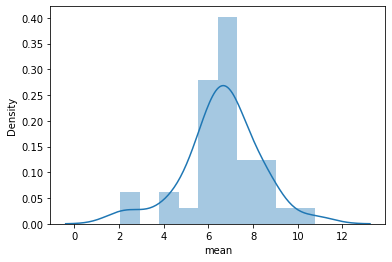

In [613]:
sns.distplot(df4['mean'])

In [614]:
df4['mean'].describe()

count    37.000000
mean      6.604058
std       1.674755
min       2.052605
25%       5.863200
50%       6.652164
75%       7.350506
max      10.792051
Name: mean, dtype: float64

In [615]:
avg_rev_per_km = 9.738657/6.604058
avg_rev_per_km

1.4746474061857118

In [616]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']

print('Number of categorical variables: ', len(categorical_features))

df[categorical_features].head()

Number of categorical variables:  4


,Time,Day,Week,Pickup time (minutes)
0,11:59 pm,Monday,Week 2,2:50
1,11:57 pm,Monday,Week 2,4:40
2,11:57 pm,Monday,Week 2,5:59
3,11:55 pm,Monday,Week 2,0:38
4,11:55 pm,Monday,Week 2,2:29


In [617]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71595 entries, 0 to 71607
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Time                      71595 non-null  object 
 1   Day                       71595 non-null  object 
 2   Week                      71595 non-null  object 
 3   Rider ID                  71595 non-null  int64  
 4   Pickup distance (meters)  71595 non-null  int64  
 5   Ride distance (meters)    71595 non-null  float64
 6   Ride duration (seconds)   71595 non-null  float64
 7   Client rating             71595 non-null  float64
 8   Client paid (Euros)       71595 non-null  float64
 9   Ride price (Euros)        71595 non-null  float64
 10  Pickup time (minutes)     71595 non-null  object 
 11  price_diff                71595 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 7.1+ MB


In [618]:
from datetime import datetime
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M %p').dt.strftime('%H:%M')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.strftime('%H')
df.head()

,Time,Day,Week,Rider ID,Pickup distance (meters),Ride distance (meters),Ride duration (seconds),Client rating,Client paid (Euros),Ride price (Euros),Pickup time (minutes),price_diff
0,23,Monday,Week 2,12,198,5249.0,695.0,5.0,7.31,7.31,2:50,0.0
1,23,Monday,Week 2,1,1653,19420.0,1760.0,5.0,21.11,21.11,4:40,0.0
2,23,Monday,Week 2,4,2669,5370.0,616.0,5.0,7.16,7.16,5:59,0.0
3,23,Monday,Week 2,1,169,13565.0,1359.0,5.0,15.58,15.58,0:38,0.0
4,23,Monday,Week 2,3,558,11624.0,1083.0,5.0,13.22,13.22,2:29,0.0


In [619]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71595 entries, 0 to 71607
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Time                      71595 non-null  object 
 1   Day                       71595 non-null  object 
 2   Week                      71595 non-null  object 
 3   Rider ID                  71595 non-null  int64  
 4   Pickup distance (meters)  71595 non-null  int64  
 5   Ride distance (meters)    71595 non-null  float64
 6   Ride duration (seconds)   71595 non-null  float64
 7   Client rating             71595 non-null  float64
 8   Client paid (Euros)       71595 non-null  float64
 9   Ride price (Euros)        71595 non-null  float64
 10  Pickup time (minutes)     71595 non-null  object 
 11  price_diff                71595 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 7.1+ MB


In [634]:
import plotly.express as px
df5 = df[['Ride duration (seconds)','Time','Day']].groupby(['Day','Time']).mean().reset_index().sort_values(by='Time',ascending=True)
fig = px.bar(df, x ='Day', y = 'Ride duration (seconds)', color = 'Time')
fig.update_layout(height = 400, width = 800, title_text = 'Dept(54) A -Weekly Sales compared against time')
fig.show()

In [630]:
df5 = df[['Ride duration (seconds)','Day']].groupby(['Day']).mean().reset_index().sort_values(by='Day',ascending=True)
df5.head()

,Day,Ride duration (seconds)
0,Friday,905.772931
1,Monday,930.332545
2,Saturday,918.947823
3,Sunday,919.235348
4,Thursday,907.761660
